In [49]:
# import libraries 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
#read the Data 
df=pd.read_csv(r'/Users/golnooshteymoori/Downloads/movies.csv')
df.head()
# lets see if there is any missing data 
dfc=df.dropna()
for col in dfc.columns: 
    PCT_missing=np.mean(dfc[col].isnull())
    print('{} - {}%'.format(col,PCT_missing))
#Data types for our columns
dfc['released']=dfc['released'].astype('string')
dfc['released'] = dfc['released'].str.replace(' (United States)', '')
dfc['released'] = dfc['released'].str.split(' \\(').str[0]
dfc['released'] = pd.to_datetime(dfc['released'].str.replace(' \\(.*\\)', ''), errors='coerce', format='%B %d, %Y')
# changing the year to the correct year 
dfc['correct_year']=dfc['released'].astype('string').str[0:4]


dfc['budget']=dfc['budget'].astype('int64')
dfc['gross']=dfc['gross'].astype('int64')
#Sort the order: 
dfc.sort_values(by=['gross'],inplace=False, ascending=False)
# removing duplicates: 
dfc['company'].sort_values(ascending=False)

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/2489418542.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['released']=dfc['released'].astype('string')
/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/2489418542.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  dfc['released'] = dfc['released'].str.replace(' (United States)', '')
/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/2489418542.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
352                                      Zoetrope Studios
724                                      Zoetrope Studios
332                                      Zoetrope Studios
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
4297                              Zentropa Entertainments
5471                              Zentropa Entertainments
3698                              Zentropa Entertainments
4829                              Zentropa Entertainments
5885          

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

    released  score      votes         director                   writer  \
0 1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1 1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2 1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3 1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4 1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime correct_year  
0    146.0         1980  
1    104.0         1980  
2    124.0         1980  
3     88.0         1980  
4     98.0         1980

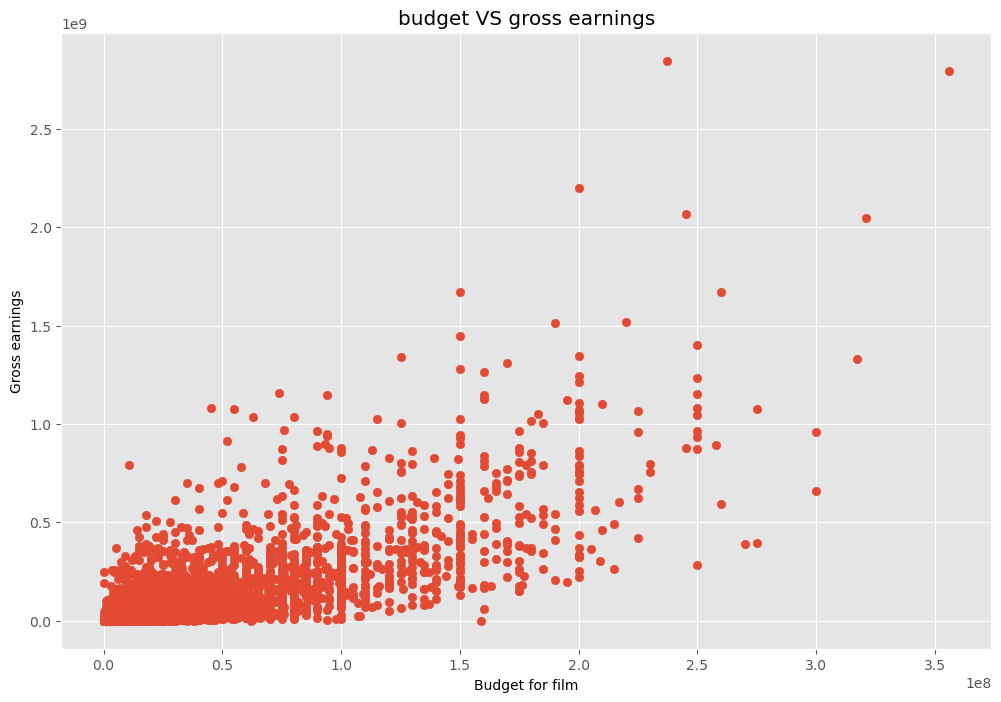

In [6]:
plt.scatter(x='budget', y='gross',data=dfc)
plt.title('budget VS gross earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross earnings')
plt.show()

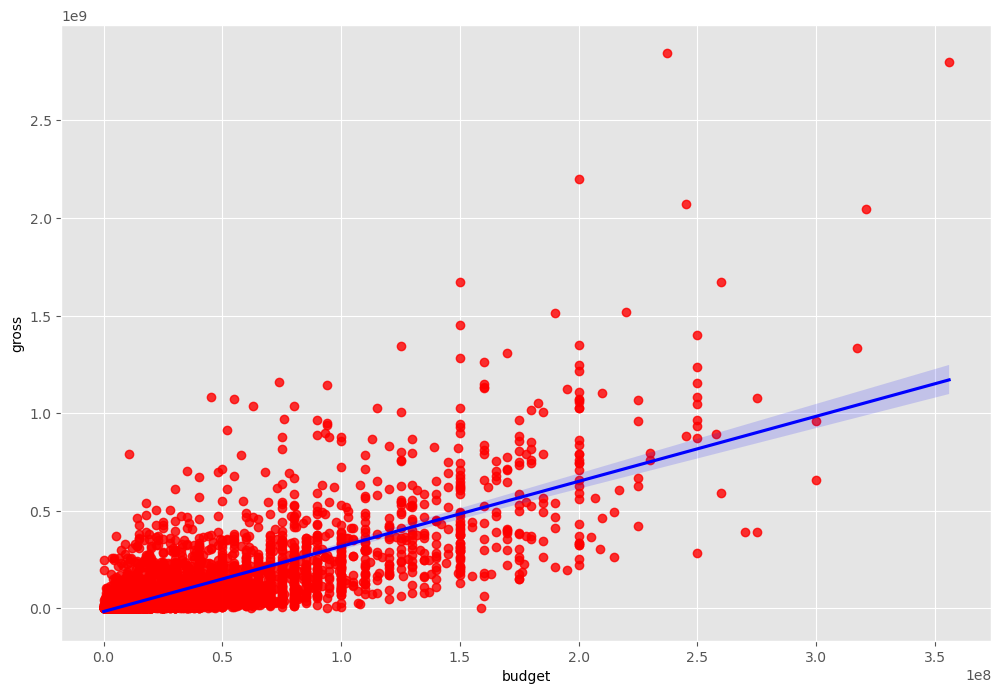

In [8]:

sns.regplot(x='budget', y='gross',data=dfc, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [9]:
#looking at correlation 
df.corr()

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/833229435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/417674943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfc.corr(),annot=True)


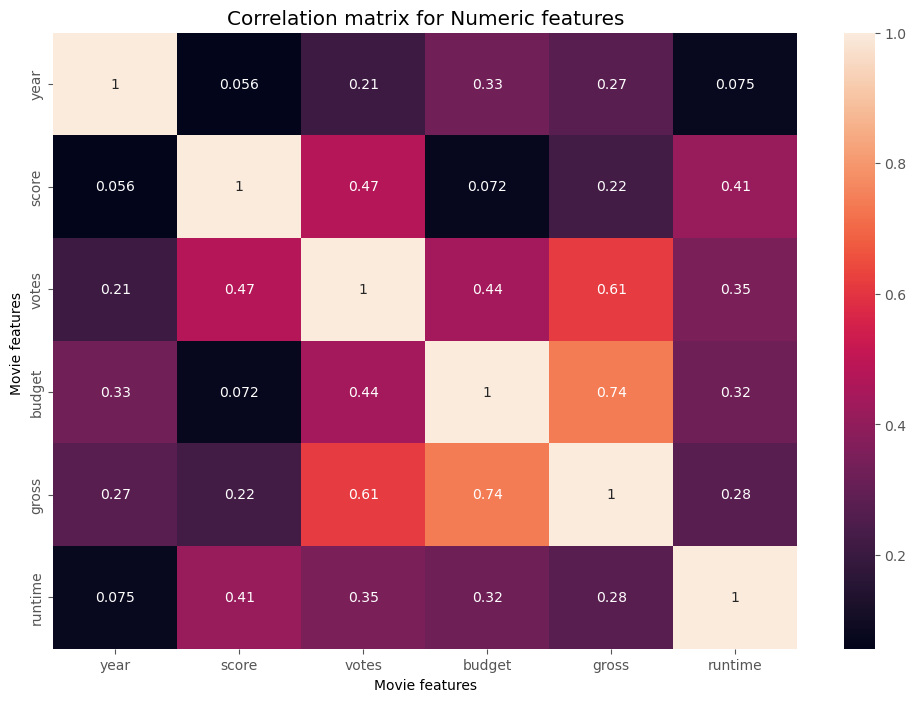

In [13]:
sns.heatmap(dfc.corr(),annot=True)
plt.title('Correlation matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features ')
plt.show()

In [39]:
df_number=dfc

In [40]:
for column in df_number.columns:
  if(df_number[column].dtype=='object'):
    df_number[column]=df_number[column].astype('category')
    df_number[column]=df_number[column].cat.codes
                                                
df_number

name  rating  genre  year   released  score      votes  director  \
0     4692       6      6  1980 1980-06-13    8.4   927000.0      1795   
1     3929       6      1  1980 1980-07-02    5.8    65000.0      1578   
2     3641       4      0  1980 1980-06-20    8.7  1200000.0       757   
3      204       4      4  1980 1980-07-02    7.7   221000.0       889   
4      732       6      4  1980 1980-07-25    7.3   108000.0       719   
5     1509       6      9  1980 1980-05-09    6.4   123000.0      1758   
6     3930       6      0  1980 1980-06-20    7.9   188000.0       974   
7     3122       6      3  1980 1980-12-19    8.2   330000.0      1269   
8     3732       4      0  1980 1981-06-19    6.8   101000.0      1606   
9     4401       6      3  1980 1980-05-16    7.0    10000.0      2011   
10     332       4      0  1980 1980-12-17    6.1    18000.0       236   
11    4179       4      1  1980 1984-10-26    7.3    54000.0       817   
12    3029       4      1  1980 1980-12-12    5.3    30000.0      1643   
13    2859       6      6  1980 1980-09-19    7.7    49000.0      1666   
14    1208       6      5  1980 1980-07-25    7.1    37000.0       207   
15    3553       4      6  1980 1980-10-03    7.2    27000.0       847   
17      66       4      4  1980 1980-12-19    6.9    29000.0       333   
18    4143       6      9  1980 1980-02-08    6.8    66000.0       943   
20     986       6      5  1980 1980-02-15    6.5    20000.0      2032   
21    1762       6      1  1980 1981-04-24    6.8    14000.0      1307   
22    4128       4      0  1980 1980-08-01    6.7    22000.0       502   
23    5289       4      8  1980 1980-08-08    5.3    12000.0      1654   
28     700       6      5  1980 1980-06-20    7.2    17000.0      1870   
29     261       6      5  1980 1980-02-01    6.2    22000.0      1489   
33     785       4      6  1980 1981-04-24    6.1      604.0      1146   
35    3068       6      4  1980 1980-10-10    6.2    24000.0       744   
36    4245       6      4  1980 1980-05-30    6.3     4300.0       581   
37    2618       6      4  1980 1980-10-24    6.0    11000.0      1116   
42    4736       6      0  1980 1980-06-27    7.1     9000.0      1613   
46    4312       6      0  1980 1980-06-13    5.3     3900.0      1337   
48    4512       4      0  1980 1980-05-09    5.1     3100.0       329   
50    3648       4      4  1980 1980-09-26    7.3    22000.0      2043   
51    2497       6      4  1980 1980-09-19    6.8     4500.0      1025   
53     692       4      0  1980 1980-06-11    6.1    11000.0       327   
56    5193       4      0  1980 1980-03-28    4.6     2600.0       793   
57    2818       4      4  1980 1980-07-11    5.4     2400.0       914   
58    4519       6      0  1980 1980-08-15    5.1     5200.0       551   
75    4351       1      1  1980 1980-06-25    5.8     1300.0       267   
77    5240       6      4  1980 1980-08-15    5.9      415.0      1484   
80    2971       6      6  1980 1980-09-09    4.0      546.0       969   
92    1973       4      0  1981 1981-06-12    8.4   905000.0      1859   
94     284       6      4  1981 1981-08-21    7.5    97000.0       974   
95    1301       6      0  1981 1981-07-10    7.2   131000.0       943   
96    4100       2      9  1981 1983-04-15    7.5   192000.0      1735   
97    3031       6      4  1981 1982-03-19    6.2    40000.0       177   
98     603       6      5  1981 1981-07-24    7.4    47000.0       207   
99     861       4      0  1981 1981-06-12    6.9    42000.0       478   
100   1329       6      1  1981 1981-04-10    7.4    59000.0       937   
101   2389       6      0  1981 1982-05-21    7.6   170000.0       654   
103   3699       6      4  1981 1981-06-26    6.9    68000.0       761   
105   3980       4      0  1981 1981-06-19    6.2    34000.0       709   
106   4864       6      0  1981 1981-03-27    7.4    27000.0      1327   
108   4902       4      1  1981 1981-11-06    7.0    60000.0      1900   
110   1510

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/663205507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_number.corr(),annot=True)


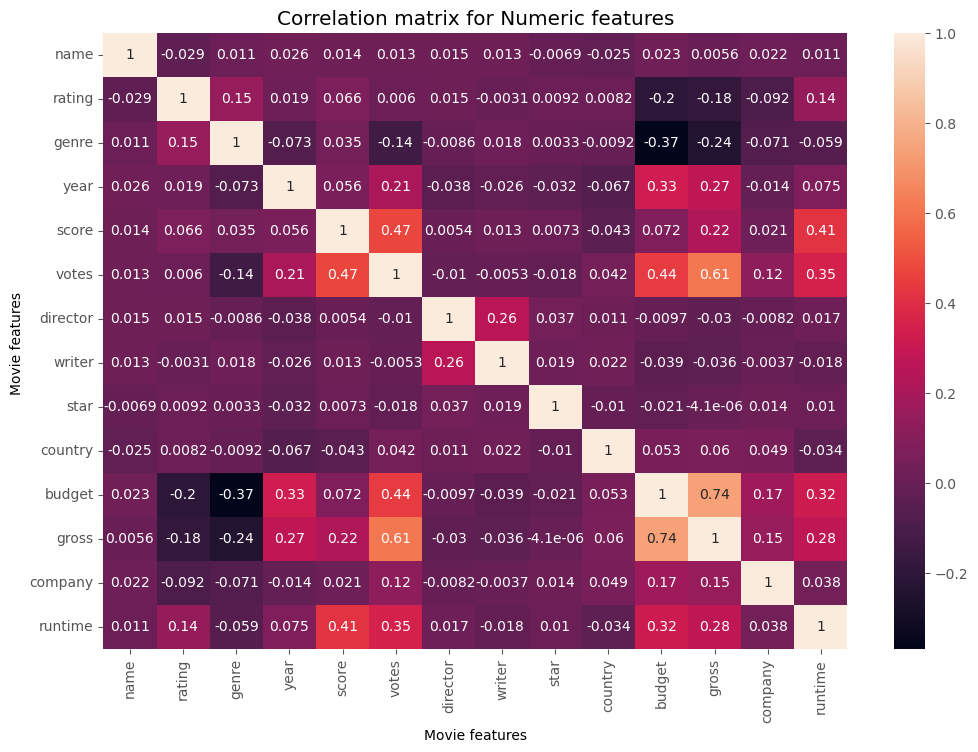

In [23]:
sns.heatmap(df_number.corr(),annot=True)
plt.title('Correlation matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features ')
plt.show()

In [41]:
Correlation_mat=df_number.corr()
corr_pairs=Correlation_mat.unstack()
corr_pairs

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_35473/2474850736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_mat=df_number.corr()


name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
          genre       1.000000
          year       -0.073167
        

In [42]:
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
          genre       1.000000
          year       -0.073167
        

In [32]:
pd.set_option('display.max_rows',None) 

In [45]:
sorted_pair=corr_pairs.sort_values()
sorted_pair

genre     budget     -0.368523
budget    genre      -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
year      genre      -0.073167
genre     year       -0.073167
company   genre      -0.071334
genre     company    -0.071334
country   year       -0.066748
year      country    -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
score     country    -0.043051
country   score      -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
runtime   country    -0.034477
country   runtime    -0.034477
year      star       -0.032157
star      year       -0.032157
director

In [47]:
#high correlation 
high_corr=sorted_pair[(sorted_pair)>0.5]
high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64